# Notes


In [ ]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from sympy.physics.units import magnetic_density

from variables import Variables as vars

plt.style.use('../../notebook.mplstyle')

os.makedirs("./output", exist_ok=True)

In [ ]:
con = duckdb.connect("./data/us_births.db", read_only=True)

### Estimate prevalence given year and ethnicity

In [163]:
eth_prev_df = con.execute(
    """
    SELECT
        year, mracehisp, down_ind, p_ds_lb_nt, p_ds_lb_wt
    FROM us_births
    WHERE year >= 2003 AND year <= 2023
    """
).df().convert_dtypes()

eth_prev_df

,year,mracehisp,down_ind,p_ds_lb_nt,p_ds_lb_wt
0,2003,6,<NA>,0.000746,0.001219
1,2003,6,<NA>,0.000684,0.001219
2,2003,<NA>,<NA>,0.000664,0.001219
3,2003,8,<NA>,0.000723,0.001219
4,2003,6,<NA>,0.001219,0.001219
...,...,...,...,...,...
83158418,2023,8,<NA>,0.002192,0.001324
83158419,2023,7,0,0.000956,0.001324
83158420,2023,7,0,0.003738,0.001324
83158421,2023,1,0,0.00283,0.001324


In [197]:
eth_ds_chance_df = pd.read_csv("./us-births-estimated-prevalence-ethnicity-2000-2023.csv").convert_dtypes()
eth_ds_chance_df.set_index(["year", "ethnicity"], inplace=True)
eth_ds_chance_df = eth_ds_chance_df.unstack("ethnicity")
eth_ds_chance_df

prevalence             \
ethnicity American Indian or Alaska Native   Hispanic   
year                                                    
2000                              7.624409  11.964842   
2001                              7.280862  12.598719   
2002                             11.570306  13.113249   
2003                             11.764376  12.983983   
2004                             10.927699  13.242371   
2005                              10.48321  13.153154   
2006                             10.425905  13.484204   
2007                             11.318638  13.415931   
2008                             11.708285  12.356754   
2009                             11.795845  13.905016   
2010                             12.114231  14.544928   
2011                             12.598796  14.857595   
2012                             13.609832   15.30731   
2013                             14.714737  15.607811   
2014                             13.912633  16.200423   
2015                                  <NA>       <NA>   
2016                             10.741986  15.996046   
2017                                  <NA>       <NA>   
2018                             13.052782   16.76941   
2019                                  <NA>       <NA>   
2020                                  <NA>       <NA>   
2021                                  <NA>       <NA>   
2022                                  <NA>       <NA>   
2023                                  <NA>       <NA>   
2024                                  <NA>       <NA>   

                                                                     \
ethnicity Non-Hispanic Asian or Pacific Islander Non-Hispanic Black   
year                                                                  
2000                                    9.429186          10.499449   
2001                                    9.882583          10.771309   
2002                                   10.149234          11.488153   
2003                                   10.363935          11.255914   
2004                                    9.731245          11.582299   
2005                                    9.810701          12.008868   
2006                                    8.802434          12.098491   
2007                                    9.280463          12.004018   
2008                                    9.655644          11.978613   
2009                                    9.770403          11.891816   
2010                                    9.664683          11.598217   
2011                                   10.787258           11.28257   
2012                                   10.789827          11.452283   
2013                                   11.617068          11.870662   
2014                                    10.08654          12.418696   
2015                                        <NA>               <NA>   
2016                                    9.100725           12.42453   
2017                                        <NA>               <NA>   
2018                                    8.871391          13.171963   
2019                                        <NA>               <NA>   
2020                                        <NA>               <NA>   
2021                                        <NA>               <NA>   
2022                                        <NA>               <NA>   
2023                                        <NA>               <NA>   
2024                                        <NA>               <NA>   

                              
ethnicity Non-Hispanic White  
year                          
2000               12.128999  
2001               12.323849  
2002               12.776885  
2003               12.774354  
2004               12.695665  
2005               12.986991  
2006               12.744387  
2007               12.840502  
2008               13.070989  
2009               12.636149  
2010               12.215485  
2011        

In [198]:
for i in range(0, 5):
    col = eth_ds_chance_df.columns[i]
    eth_ds_chance_df[col] = eth_ds_chance_df[col].fillna(
        eth_ds_chance_df[col].rolling(window=10, min_periods=1).mean()) / 10000
eth_ds_chance_df

prevalence            \
ethnicity American Indian or Alaska Native  Hispanic   
year                                                   
2000                              0.000762  0.001196   
2001                              0.000728   0.00126   
2002                              0.001157  0.001311   
2003                              0.001176  0.001298   
2004                              0.001093  0.001324   
2005                              0.001048  0.001315   
2006                              0.001043  0.001348   
2007                              0.001132  0.001342   
2008                              0.001171  0.001236   
2009                               0.00118  0.001391   
2010                              0.001211  0.001454   
2011                               0.00126  0.001486   
2012                              0.001361  0.001531   
2013                              0.001471  0.001561   
2014                              0.001391   0.00162   
2015                              0.001247  0.001441   
2016                              0.001074    0.0016   
2017                              0.001265  0.001485   
2018                              0.001305  0.001677   
2019                              0.001296  0.001561   
2020                              0.001311  0.001579   
2021                              0.001321  0.001598   
2022                              0.001311  0.001614   
2023                              0.001257  0.001632   
2024                               0.00119  0.001638   

                                                                     \
ethnicity Non-Hispanic Asian or Pacific Islander Non-Hispanic Black   
year                                                                  
2000                                    0.000943            0.00105   
2001                                    0.000988           0.001077   
2002                                    0.001015           0.001149   
2003                                    0.001036           0.001126   
2004                                    0.000973           0.001158   
2005                                    0.000981           0.001201   
2006                                     0.00088            0.00121   
2007                                    0.000928             0.0012   
2008                                    0.000966           0.001198   
2009                                    0.000977           0.001189   
2010                                    0.000966            0.00116   
2011                                    0.001079           0.001128   
2012                                    0.001079           0.001145   
2013                                    0.001162           0.001187   
2014                                    0.001009           0.001242   
2015                                    0.001005           0.001184   
2016                                     0.00091           0.001242   
2017                                    0.001018           0.001186   
2018                                    0.000887           0.001317   
2019                                    0.001013           0.001203   
2020                                    0.001021            0.00121   
2021                                    0.001009           0.001227   
2022                                    0.000992           0.001247   
2023                                    0.000935           0.001267   
2024                                    0.000899            0.00128   

                              
ethnicity Non-Hispanic White  
year                          
2000                0.001213  
2001                0.001232  
2002                0.001278  
2003                0.001277  
2004                 0.00127  
2005                0.001299  
2006                0.001274  
2007                0.001284  
2008                0.001307  
2009                0.001264  
2010                0.001222  
2011                0.001227  
2012     

In [202]:
eth_ds_chance_df.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024],
      dtype='Int64', name='year')

In [206]:
lookup = eth_ds_chance_df.copy()
lookup.columns = eth_ds_chance_df.columns.droplevel(0)
lookup.columns = [col.replace("\n", "_") for col in lookup.columns]
lookup = lookup.reset_index().melt(id_vars="year", var_name="label", value_name="rate").set_index("year")
lookup

,label,rate
year,,
2000,American Indian or Alaska Native,0.000762
2001,American Indian or Alaska Native,0.000728
2002,American Indian or Alaska Native,0.001157
2003,American Indian or Alaska Native,0.001176
2004,American Indian or Alaska Native,0.001093
...,...,...
2020,Non-Hispanic White,0.001247
2021,Non-Hispanic White,0.001251
2022,Non-Hispanic White,0.001258


In [171]:
mracehisp_to_label = {
    1: "Non-Hispanic White",
    2: "Non-Hispanic Black",
    3: "American Indian or Alaska Native",
    4: "Non-Hispanic Asian or Pacific Islander",
    5: "Non-Hispanic Asian or Pacific Islander",
    6: "Non-Hispanic_more_than_one",
    7: "Hispanic",
}
eth_prev_df["label"] = eth_prev_df["mracehisp"].map(mracehisp_to_label)

,year,mracehisp,down_ind,p_ds_lb_nt,p_ds_lb_wt,ethnicity
0,2003,6,<NA>,0.000746,0.001219,NaN
1,2003,6,<NA>,0.000684,0.001219,NaN
2,2003,<NA>,<NA>,0.000664,0.001219,NaN
3,2003,8,<NA>,0.000723,0.001219,NaN
4,2003,6,<NA>,0.001219,0.001219,NaN
...,...,...,...,...,...,...
83158418,2023,8,<NA>,0.002192,0.001324,NaN
83158419,2023,7,0,0.000956,0.001324,Hispanic
83158420,2023,7,0,0.003738,0.001324,Hispanic
83158421,2023,1,0,0.00283,0.001324,Non-Hispanic White


In [62]:
eth_prev_df["p_ds_lb_nt_eth"] = eth_prev_df.apply(
    lambda row: eth_ds_chance_df.loc[(row["year"], row["mracehisp"]), "p_ds_lb_wt_eth"] if row["mracehisp"] != 5 else 0,
)
eth_prev_df

KeyError: (np.float64(2003.0), <NA>)

In [ ]:
plt.figure(figsize=(12, 5))
plt.title("Estimated vs recorded annual DS live births")
plt.xlabel("Year")
plt.ylabel("Estimate/count")
plt.bar(mage_df.index, mage_df[vars.P_DS_LB_NT], label="DS live births absent terminations")
plt.bar(mage_df.index, mage_df[vars.P_DS_LB_WT], label="DS live births")
plt.plot(mage_df.index, mage_df[vars.DOWN_IND], marker='o', color="#ff9060", label='Recorded DS live births')
plt.legend()

In [ ]:
age_ds_df = df[[vars.MAGE_C, vars.P_DS_LB_NT, vars.P_DS_LB_WT]].groupby(vars.MAGE_C).describe()
age_ds_df

In [ ]:
recorded_df = df[df[vars.DOWN_IND] == 1]

In [ ]:
age_ds_recorded_df = recorded_df[[vars.MAGE_C, vars.P_DS_LB_NT, vars.P_DS_LB_WT]].groupby(vars.MAGE_C).describe()
age_ds_recorded_df

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_WT, 'mean')], color="#99ccff",
         label="Chance of DS live birth (recorded)")
plt.plot(age_ds_df.index, age_ds_df[(vars.P_DS_LB_WT, 'mean')], color="#99d066", label="Chance of DS live birth (all)")
plt.legend()

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6))

axs[0].set_title("Recorded DS births")
axs[0].bar(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_NT, 'count')], color="#99ccff")

axs[1].set_title("DS births (all, estimated given maternal age)")
axs[1].bar(age_ds_df.index, age_ds_df[(vars.P_DS_LB_NT, 'count')], color="#99d066")


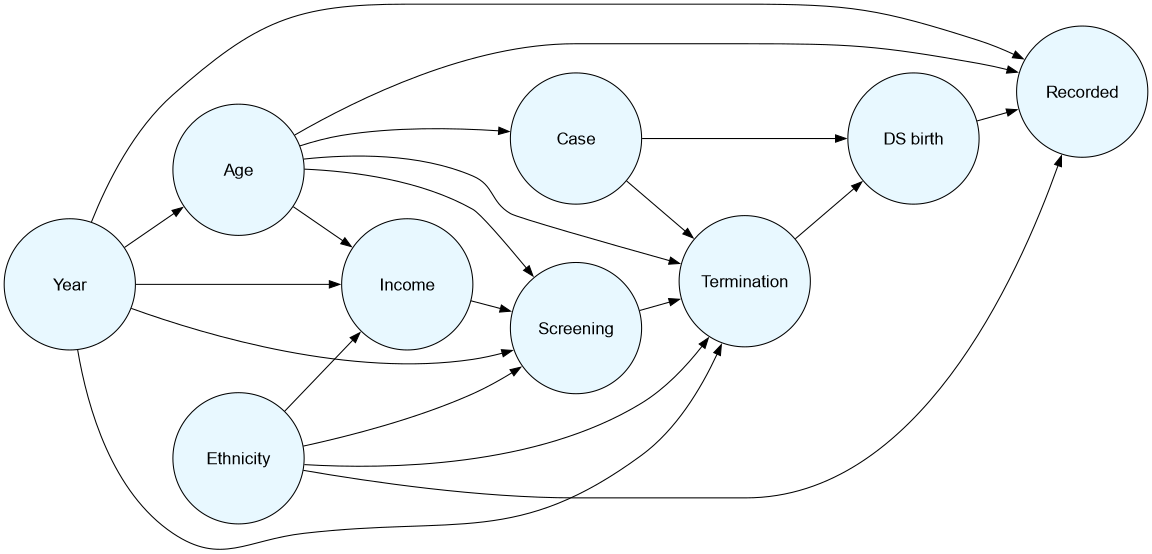

In [50]:
from graphviz import Digraph

dag = Digraph()

dag.attr(fontname="Helvetica")
dag.attr("node", fontname="Helvetica")
dag.attr("edge", fontname="Helvetica")

# set font sizes
dag.attr(size="12,12")
dag.attr("node", fontsize="16", style="filled", fillcolor="#e8f8ff")
dag.attr("edge", fontsize="16")

dag.attr(rankdir="LR", splines="spline")  # Top-to-bottom flow
dag.attr("node", shape="circle", fixedsize="true", width="1.75")

edges = [
    ('Age', 'Case'),
    ('Age', 'Screening'),
    ('Age', 'Termination'),
    ('Age', 'Income'),
    ('Age', 'Recorded'),
    ('Year', 'Age'),
    ('Year', 'Screening'),
    ('Year', 'Termination'),
    ('Year', 'Income'),
    ('Year', 'Recorded'),
    ('Ethnicity', 'Income'),
    ('Ethnicity', 'Screening'),
    ('Ethnicity', 'Termination'),
    ('Ethnicity', 'Recorded'),
    ('Income', 'Screening'),
    ('Case', 'Termination'),
    ('Case', 'DS birth'),
    ('Screening', 'Termination'),
    ('Termination', 'DS birth'),
    ('DS birth', 'Recorded'),
]

for src, dst in edges:
    dag.edge(src, dst)

from IPython import display

display.display_png(dag)
